# Problem Statement
Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

Target
The target column is fraud_reported where we have to predict the fraud is reported or not

# Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

# Dataset contains 1000 rows & 40 columns

In [4]:
df.head()  # first five rows of the datset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()   #last five rows of the dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.columns   #columns present in the dataset

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.info()   #a small info about the ech column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking the null values

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

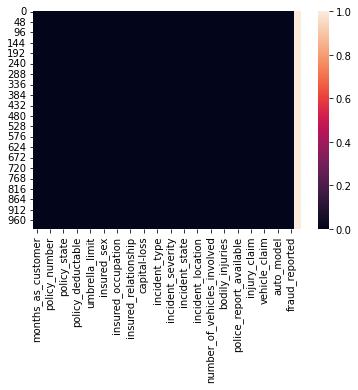

In [9]:
sns.heatmap(df.isnull())  #plotting the null values using heatmap

# Handling the '?' present in the dataset

In [10]:
df.replace({'?':np.nan},inplace=True)

In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
df.drop('_c39',axis=1,inplace=True)  #dropping as the whole cloumn is blank

In [13]:
df['police_report_available'].mode()

0    NO
Name: police_report_available, dtype: object

# Handling the null valus

In [14]:
df['collision_type']=df['collision_type'].fillna('Rear Collision')
df['property_damage']=df['property_damage'].fillna('NO')
df['police_report_available']=df['police_report_available'].fillna('NO')

# Univariate analysis

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

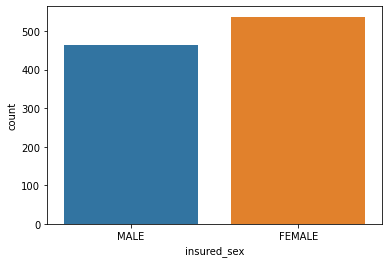

In [15]:
sns.countplot(df['insured_sex'])

# Females are more in number of insured people

<AxesSubplot:xlabel='incident_state', ylabel='count'>

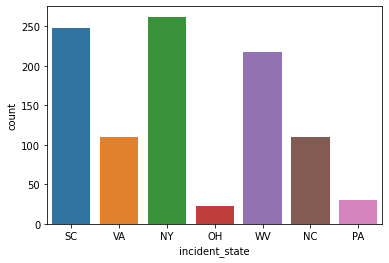

In [16]:
sns.countplot(df['incident_state'])

# most of the incident happenf in NY city followed by SC, WV

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

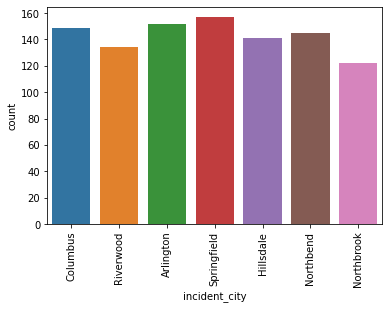

In [17]:
sns.countplot(df['incident_city'])
plt.xticks(rotation=90)

# almost all the city have equal no of incidents

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

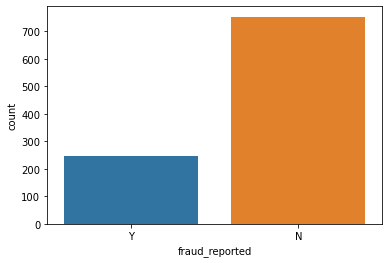

In [18]:
sns.countplot(df['fraud_reported'])

# less numbers of incidents where a fraud report is found, most of the cases are genuine

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

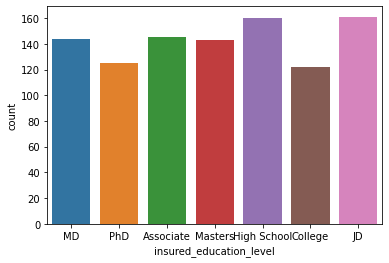

In [19]:
sns.countplot(df['insured_education_level'])

# Most of the insureds are highschool or JD

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

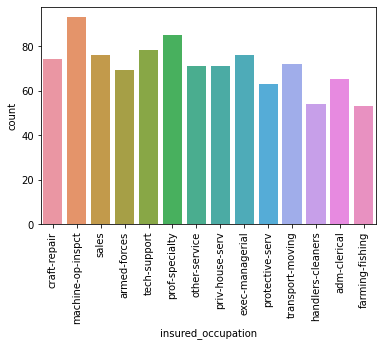

In [20]:
sns.countplot(df['insured_occupation'])
plt.xticks(rotation=90)

# machine-op-inspct occupation is occupied by many peoples followed bt prof-speciality

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

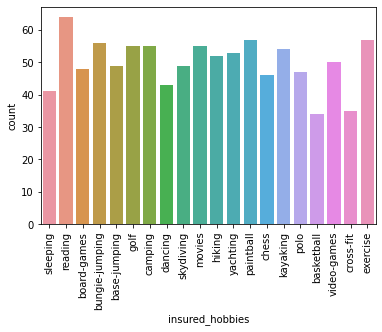

In [21]:
sns.countplot(df['insured_hobbies'])
plt.xticks(rotation=90)

# There are so many hobbies which insured carry

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

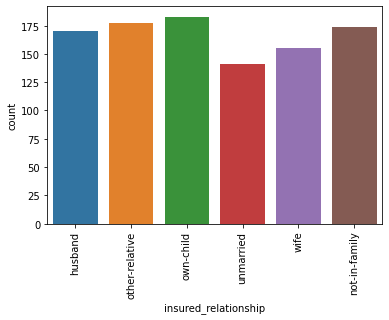

In [22]:
sns.countplot(df['insured_relationship'])
plt.xticks(rotation=90)

# most of the time insured one is own child

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

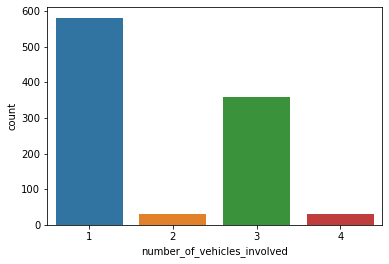

In [23]:
sns.countplot(df['number_of_vehicles_involved'])

# mostly one vehicle is involved in the incident

<AxesSubplot:xlabel='property_damage', ylabel='count'>

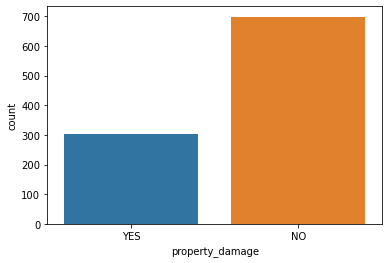

In [24]:
sns.countplot(df['property_damage'])

# most of the time there is no propert damage

<AxesSubplot:xlabel='policy_state', ylabel='count'>

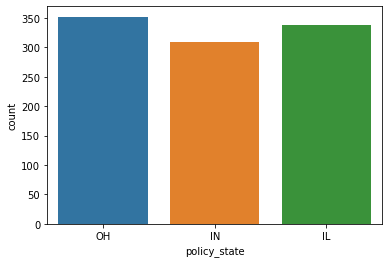

In [25]:
sns.countplot(df['policy_state'])

# almost in each state there are equal no of policies

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

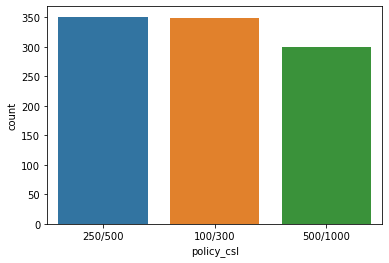

In [26]:
sns.countplot(df['policy_csl'])

# equals counts for ech policy csl

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

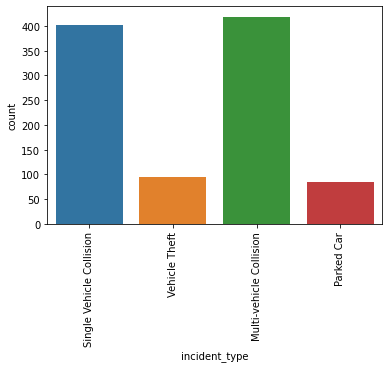

In [28]:
sns.countplot(df['incident_type'])
plt.xticks(rotation=90)

# Most of the incidents are multi vehicle collision followed by single vehicle collision

(array([0, 1, 2]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

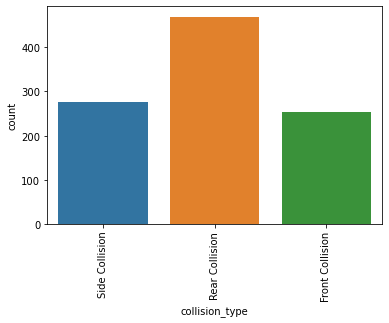

In [29]:
sns.countplot(df['collision_type'])
plt.xticks(rotation=90)

# Rear collision is happened most of the time

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

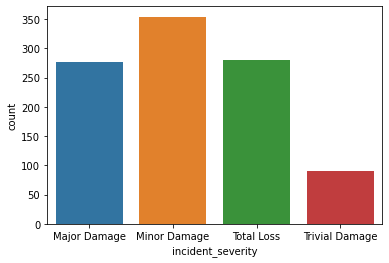

In [30]:
sns.countplot(df['incident_severity'])

# Minor damage is there in the incidents

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

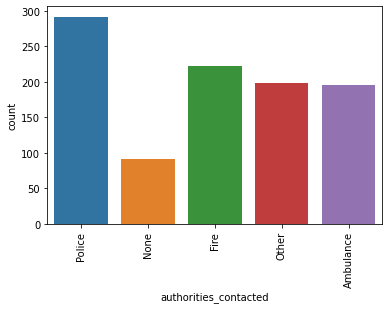

In [31]:
sns.countplot(df['authorities_contacted'])
plt.xticks(rotation=90)

# Police is contacted most of the cases followed by fire, ambulance, other

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

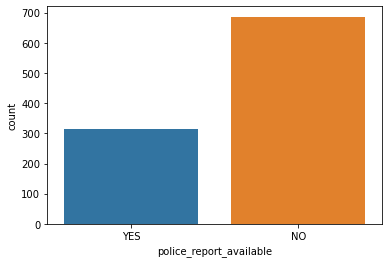

In [32]:
sns.countplot(df['police_report_available'])

# police report is not available in most of the cases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

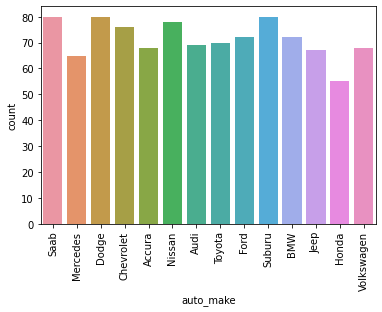

In [33]:
sns.countplot(df['auto_make'])
plt.xticks(rotation=90)

# there are almost equals counts for every auto make

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

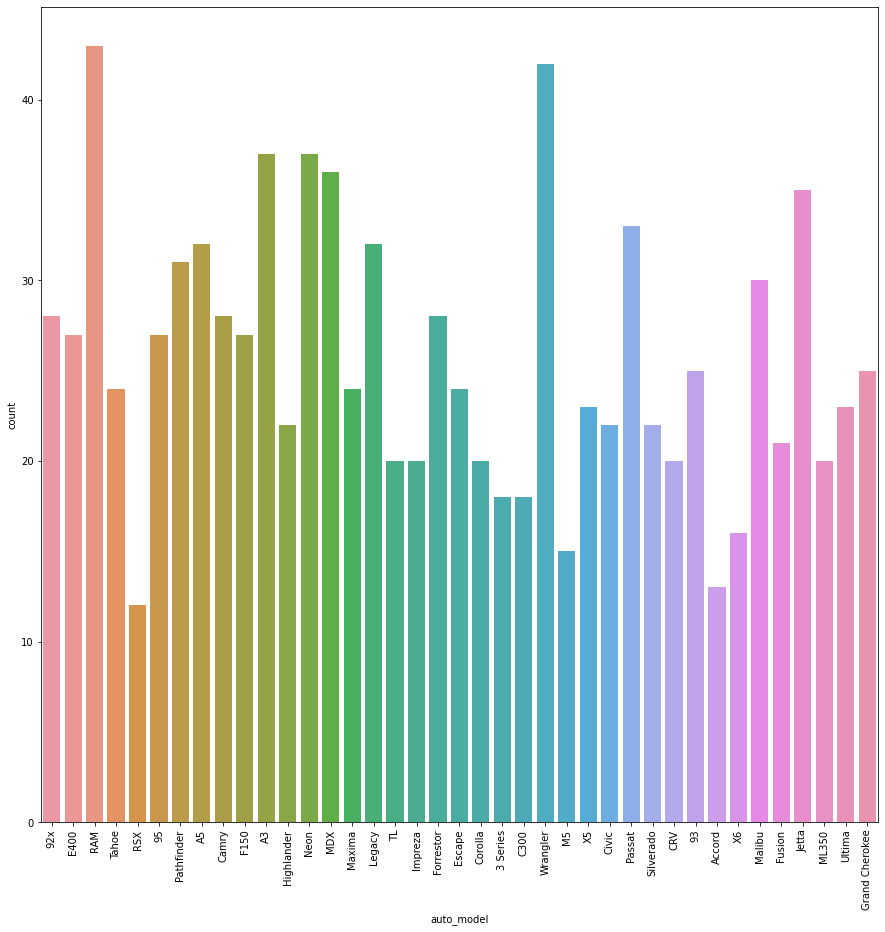

In [34]:
plt.figure(figsize=(15,15))
sns.countplot(df['auto_model'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

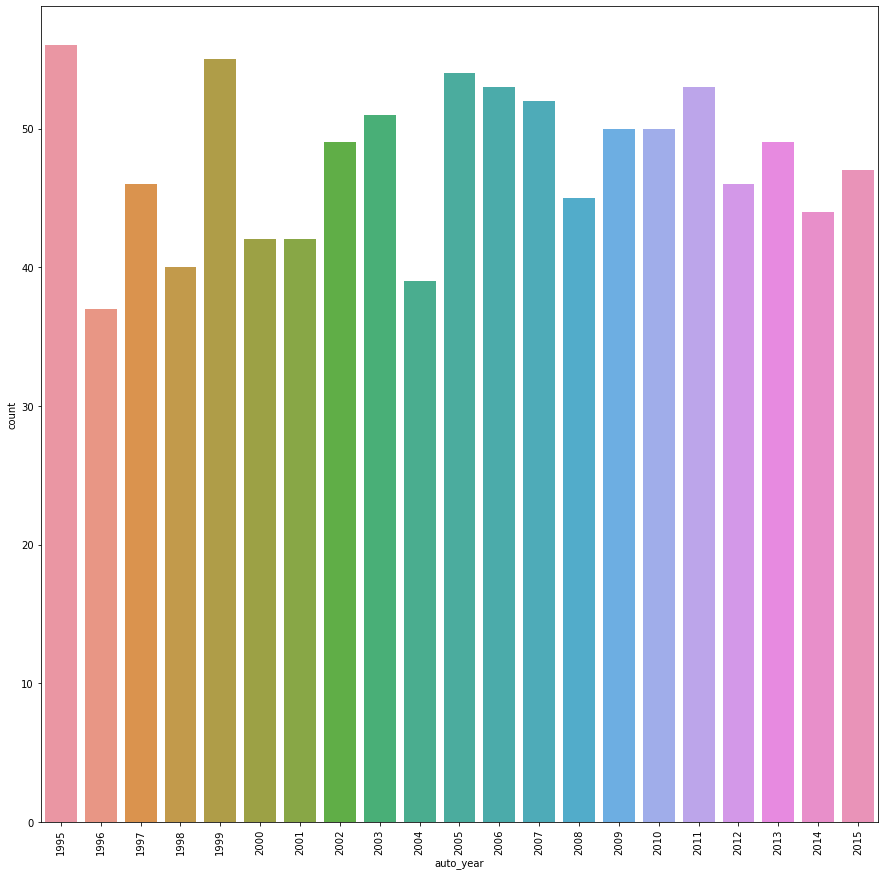

In [35]:
plt.figure(figsize=(15,15))
sns.countplot(df['auto_year'])
plt.xticks(rotation=90)

# most of the auto years are 2005,2006, 2007,1995,1999,2011

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

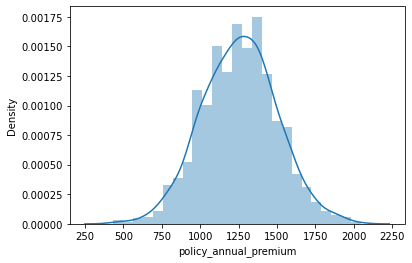

In [36]:
sns.distplot(df['policy_annual_premium'])

# a normal distributed curve

<AxesSubplot:xlabel='age', ylabel='Density'>

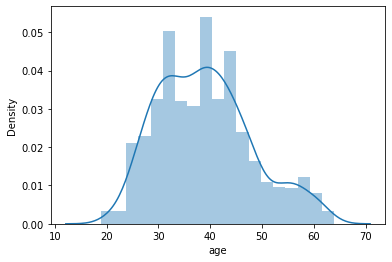

In [37]:
sns.distplot(df['age'])

# maximum insured are

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

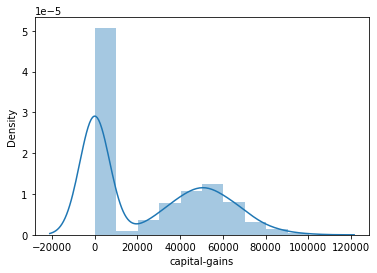

In [38]:
sns.distplot(df['capital-gains'])

# a very high density around zero

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

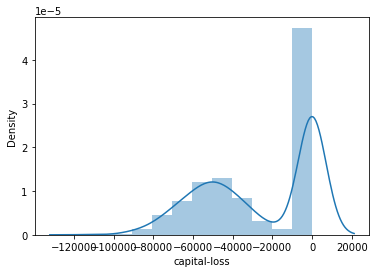

In [39]:
sns.distplot(df['capital-loss'])

# a very high density around zero

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

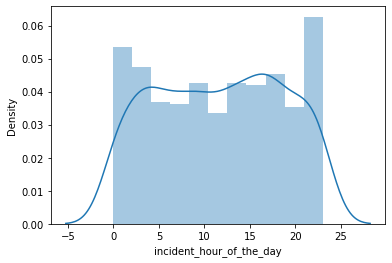

In [40]:
sns.distplot(df['incident_hour_of_the_day'])

# accidents can happen at any hour

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

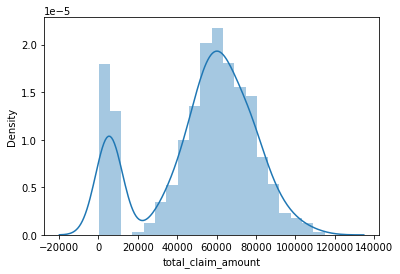

In [41]:
sns.distplot(df['total_claim_amount'])

# a normal distibuted curve between 20000 to 120000

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

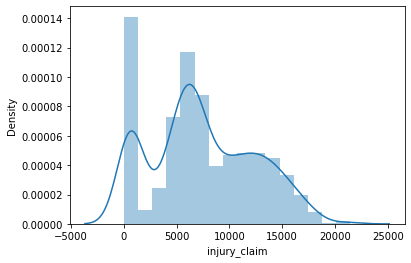

In [43]:
sns.distplot(df['injury_claim'])

# more in between the 5000 to 15000

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

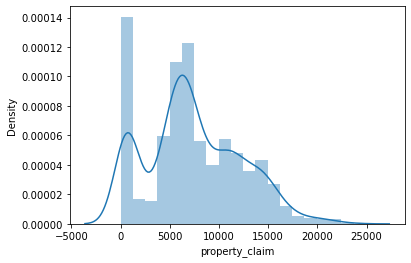

In [44]:
sns.distplot(df['property_claim'])

# more in between 5000 to 15000

# Bivariate Analysis

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

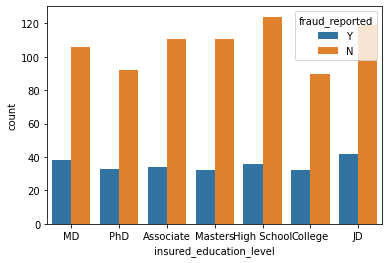

In [45]:
sns.countplot(df['insured_education_level'],hue=df['fraud_reported'])

# There is less number of fraud reports whatever be the education of insured

<AxesSubplot:xlabel='incident_state', ylabel='incident_hour_of_the_day'>

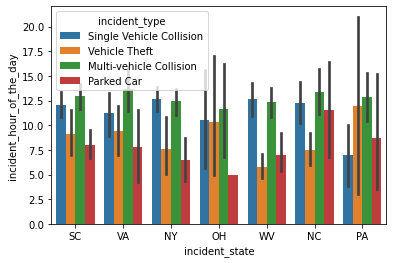

In [46]:
sns.barplot(df['incident_state'],df['incident_hour_of_the_day'],hue=df['incident_type'])

# in most of the states multi vehicle collision is there mainly in noon hours

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

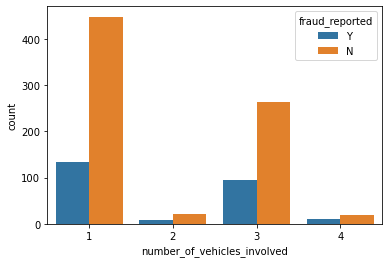

In [47]:
sns.countplot(df['number_of_vehicles_involved'],hue=df['fraud_reported'])

# there is very less count where 4 vehicles are include and number of fraud reports has a higher chance with one vehicle involvement

<AxesSubplot:xlabel='capital-gains', ylabel='fraud_reported'>

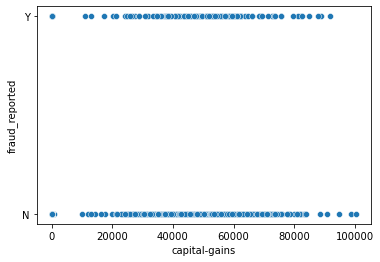

In [48]:
sns.scatterplot(df['capital-gains'],df['fraud_reported'])

# data is continuous between 20000 to 80000

<AxesSubplot:xlabel='capital-loss', ylabel='fraud_reported'>

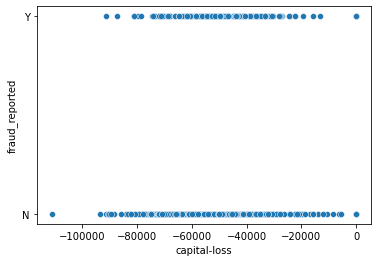

In [50]:
sns.scatterplot(df['capital-loss'],df['fraud_reported'])

# data is more towards the lowers side

<AxesSubplot:xlabel='total_claim_amount', ylabel='fraud_reported'>

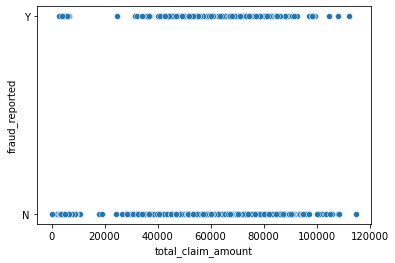

In [51]:
sns.scatterplot(df['total_claim_amount'],df['fraud_reported'])

# data is sontinuous between 20000 to 100000

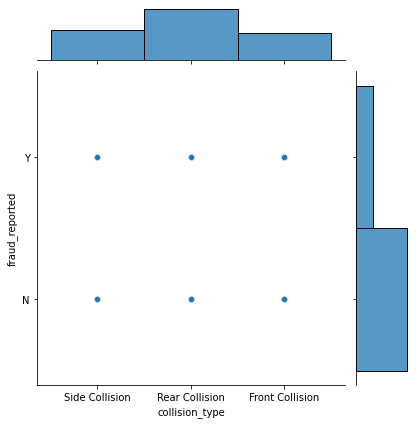

In [52]:
sns.jointplot(df['collision_type'],df['fraud_reported'])

# There are high rear collision incident and fraud report against them

<AxesSubplot:xlabel='incident_severity', ylabel='number_of_vehicles_involved'>

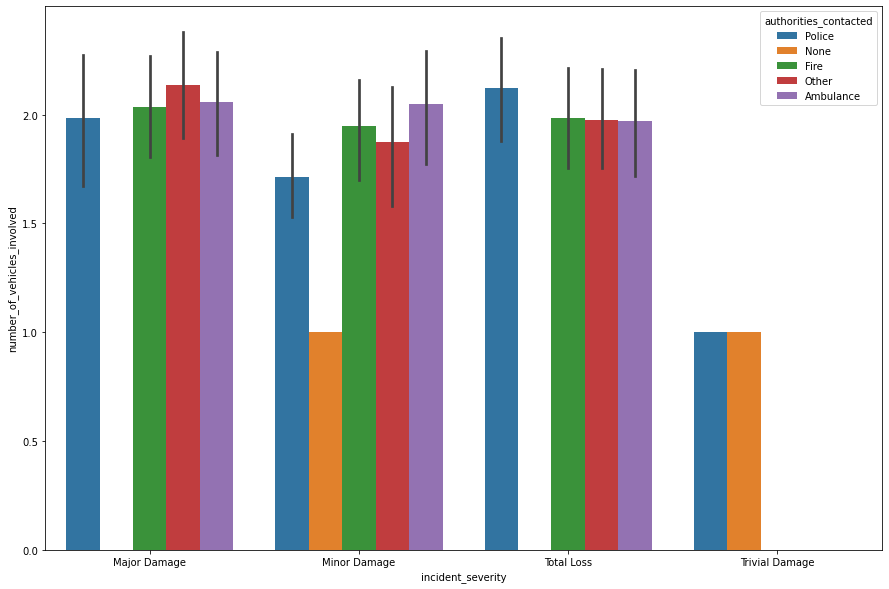

In [53]:
plt.figure(figsize=(15,10))
sns.barplot(df['incident_severity'],df['number_of_vehicles_involved'],hue=df['authorities_contacted'])

# Police is contacted every time and ambulance is also contacted except in trivial damage. Fire & other authorities contacted when ther is major, minor and total loss

<AxesSubplot:xlabel='property_damage', ylabel='count'>

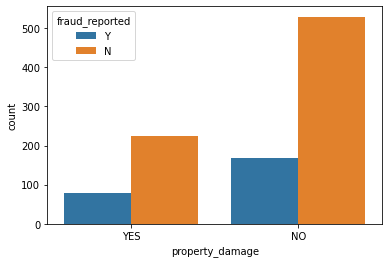

In [54]:
sns.countplot(df['property_damage'],hue=df['fraud_reported'])

# there is more count of no property damage and no fraud report

<AxesSubplot:xlabel='incident_state', ylabel='count'>

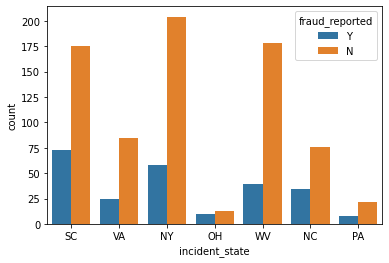

In [55]:
sns.countplot(df['incident_state'],hue=df['fraud_reported'])

# SC has the more number of fraud reports while in NY there is high number of true claims

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='witnesses'>

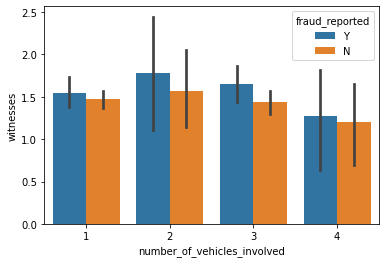

In [56]:
sns.barplot(df['number_of_vehicles_involved'],df['witnesses'],hue=df['fraud_reported'])

# with the help of witnesses fraud reports can be verified. Involvement of two vehicles have a chance of fraud report

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

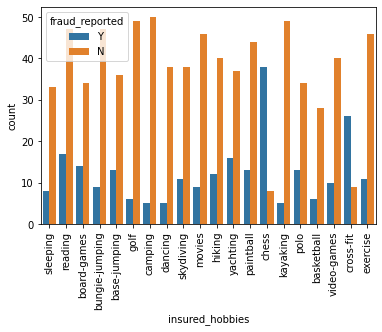

In [57]:
sns.countplot(df['insured_hobbies'],hue=df['fraud_reported'])
plt.xticks(rotation=90)

# the count of chess and crossfit persons are more in fraud reports than any other hobbies

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

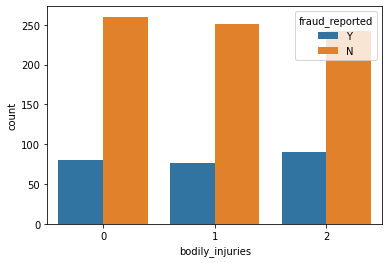

In [58]:
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])

# there are almost eqaul numbers of fraud reports

<AxesSubplot:xlabel='capital-loss', ylabel='property_claim'>

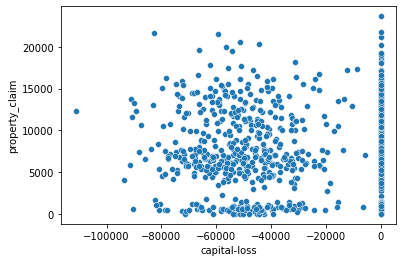

In [59]:
sns.scatterplot(df['capital-loss'],df['property_claim'])

# data towards zero is more than other values

<AxesSubplot:xlabel='capital-gains', ylabel='property_claim'>

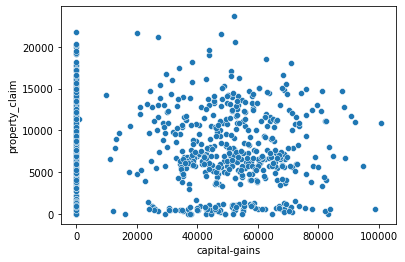

In [60]:
sns.scatterplot(df['capital-gains'],df['property_claim'])

# data towards zero is more than other values

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

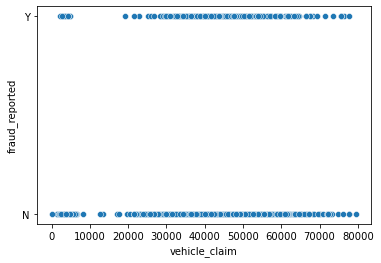

In [61]:
sns.scatterplot(df['vehicle_claim'],df['fraud_reported'])

# for large amount of vehicle claim we found there are chances of fraud reports

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '25-01-2015'),
  Text(1, 0, '21-01-2015'),
  Text(2, 0, '22-02-2015'),
  Text(3, 0, '10-01-2015'),
  Text(4, 0, '17-02-2015'),
  Text(5, 0, '02-01-2015'),
  Text(6, 0, '13-01-2015'),
  Text(7, 0, '27-02-2015'),
  Text(8, 0, '30-01-2015'),
  Text(9, 0, '05-01-2015'),
  Text(10, 0, '06-01-2015'),
  Text(11, 0, '15-02-2015'),
  Text(12, 0, '22-01-2015'),
  Text(13, 0, '08-01-2015'),
  Text(14, 0, '15-01-2015'),
  Text(15, 0, '29-01-2015'),
  Text(16, 0, '19-01-2015'),
  Text(17, 0, '01-01-2015'),
  Text(18, 0, '10-02-2015'),
  Text(19, 0, '11-01-2015'),
  Text(20, 0, '24-02-2015'),
  Text(21, 0, '09-01-2015'),
  Text(22, 0, '28-01-2015'),
  Text(23, 0, '07-01-2015'),
  Text(24, 0, '18-01-2015'),
  Text(25, 

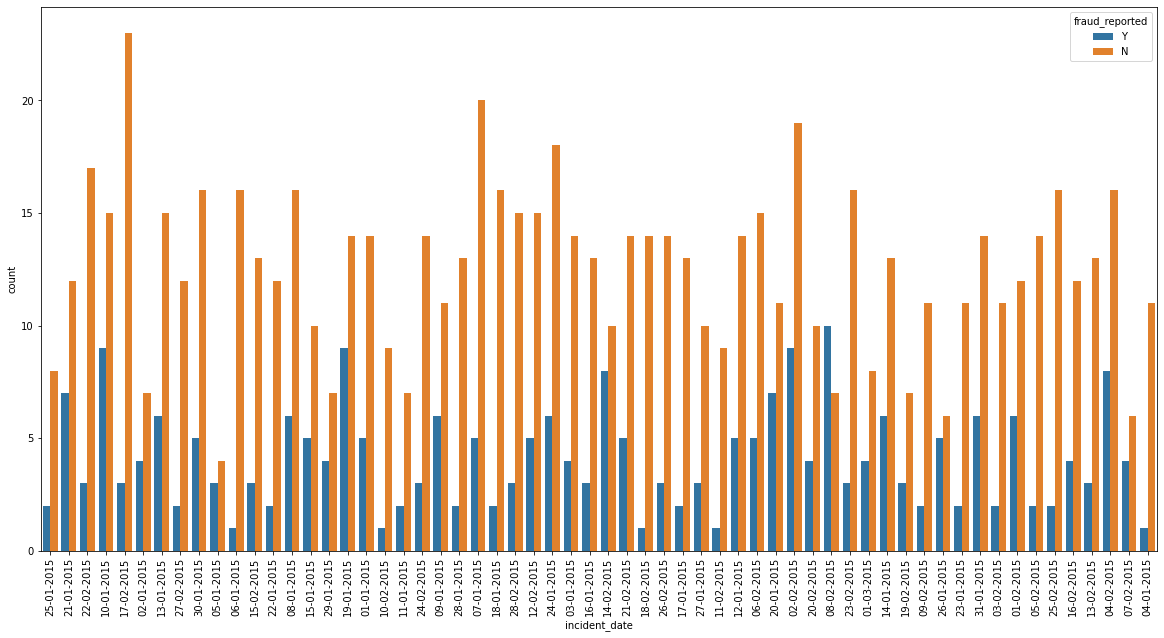

In [62]:
plt.figure(figsize=(20,10))
sns.countplot(df['incident_date'],hue=df['fraud_reported'])
plt.xticks(rotation=90)

# almost on every date we have less number fraud reports except on 08-02-2015 where we found the number of fraud reports more

In [63]:
df.drop(['policy_number','policy_bind_date','policy_csl'],axis=1,inplace=True)  #dropping the irrelevant columns

# Label Encoding

In [64]:
objList = df.select_dtypes(include = "object").columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in objList:
    df[i]=le.fit_transform(df[i].astype(str))
        
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1000,1406.91,0,466132,1,4,2,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,2000,1197.22,5000000,468176,1,4,6,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,2000,1413.14,5000000,430632,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,2000,1415.74,6000000,608117,0,6,1,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,1000,1583.91,6000000,610706,1,0,11,...,1,0,6500,1300,650,4550,0,31,2009,0


# Statistical Summary

In [65]:
df.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


1) total count is 1000 rows
2) min vlaue equal to zero is also present
3) Very less outliers present in the dataset
4) very less skewness present

# Correlation

In [66]:
corr=df.corr()
corr

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,...,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.069077,-0.006160,-0.020298,1.000000,...,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564


<AxesSubplot:>

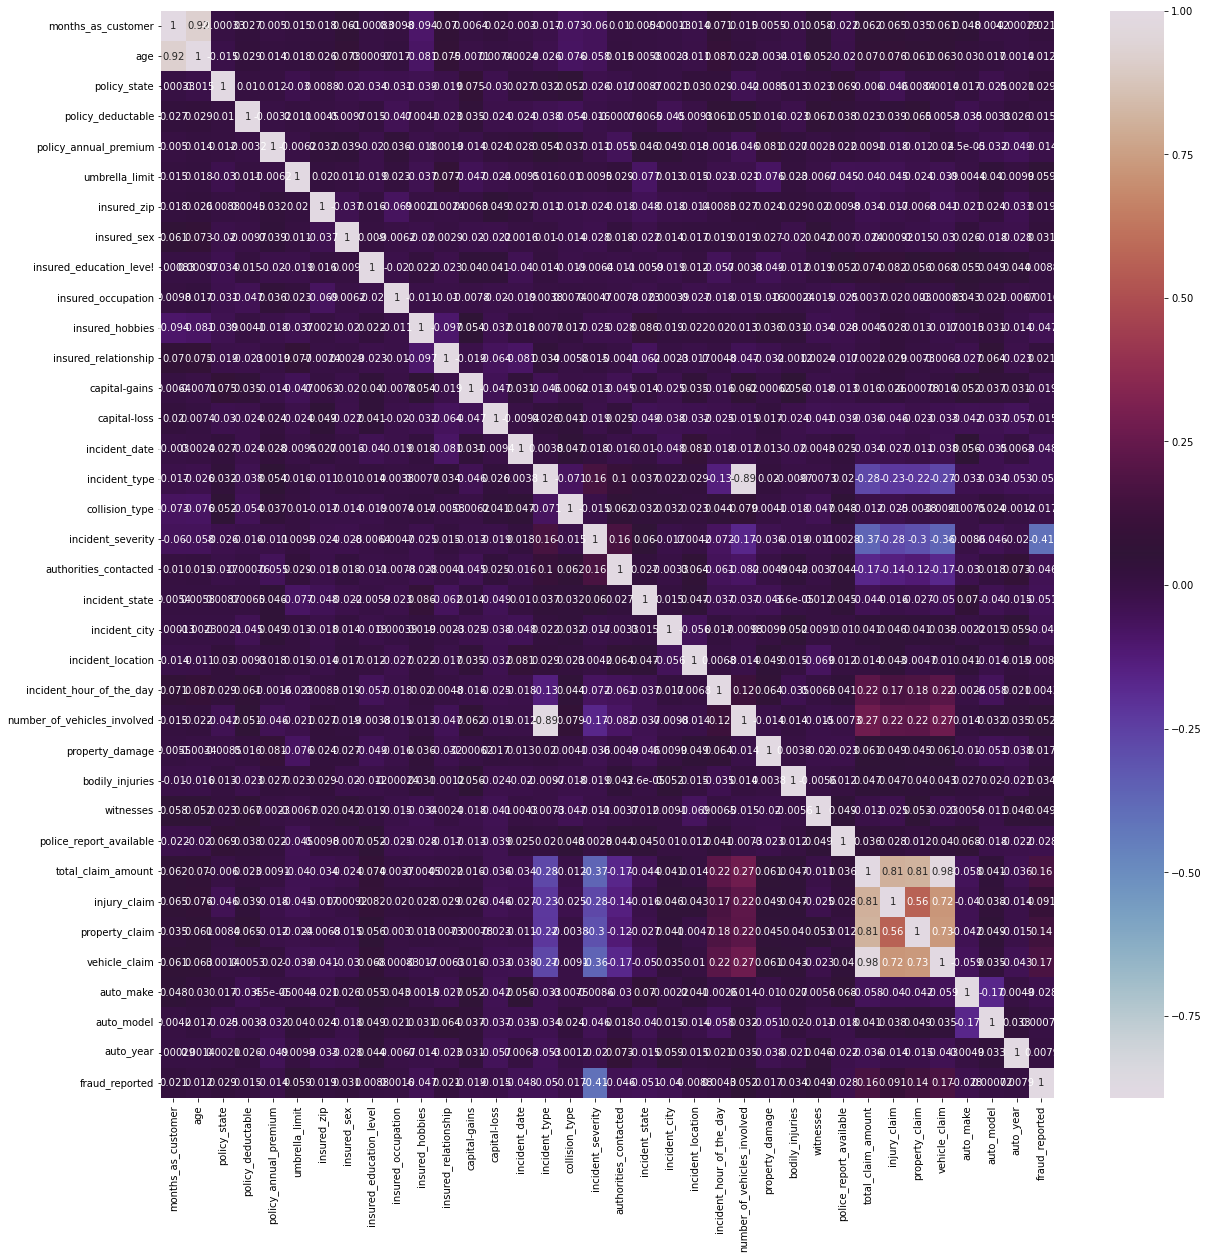

In [67]:
plt.figure(figsize=(20,20))  #correlation using the heatmap
sns.heatmap(corr,annot=True,cmap='twilight')

In [68]:
corr['fraud_reported'].sort_values()  #correlation of each column with the target column

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043


In [69]:
df.drop(['auto_model','insured_occupation','incident_hour_of_the_day','auto_year'],axis=1,inplace=True)  #dropping the columns who are very less cor

In [70]:
df.shape

(1000, 32)

# Plotting the outliers

months_as_customer                AxesSubplot(0.125,0.799681;0.168478x0.0803191)
age                            AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
policy_state                   AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
policy_deductable              AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
policy_annual_premium             AxesSubplot(0.125,0.703298;0.168478x0.0803191)
umbrella_limit                 AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
insured_zip                    AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
insured_sex                    AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
insured_education_level           AxesSubplot(0.125,0.606915;0.168478x0.0803191)
insured_hobbies                AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
insured_relationship           AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
capital-gains                  AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
capital-loss                

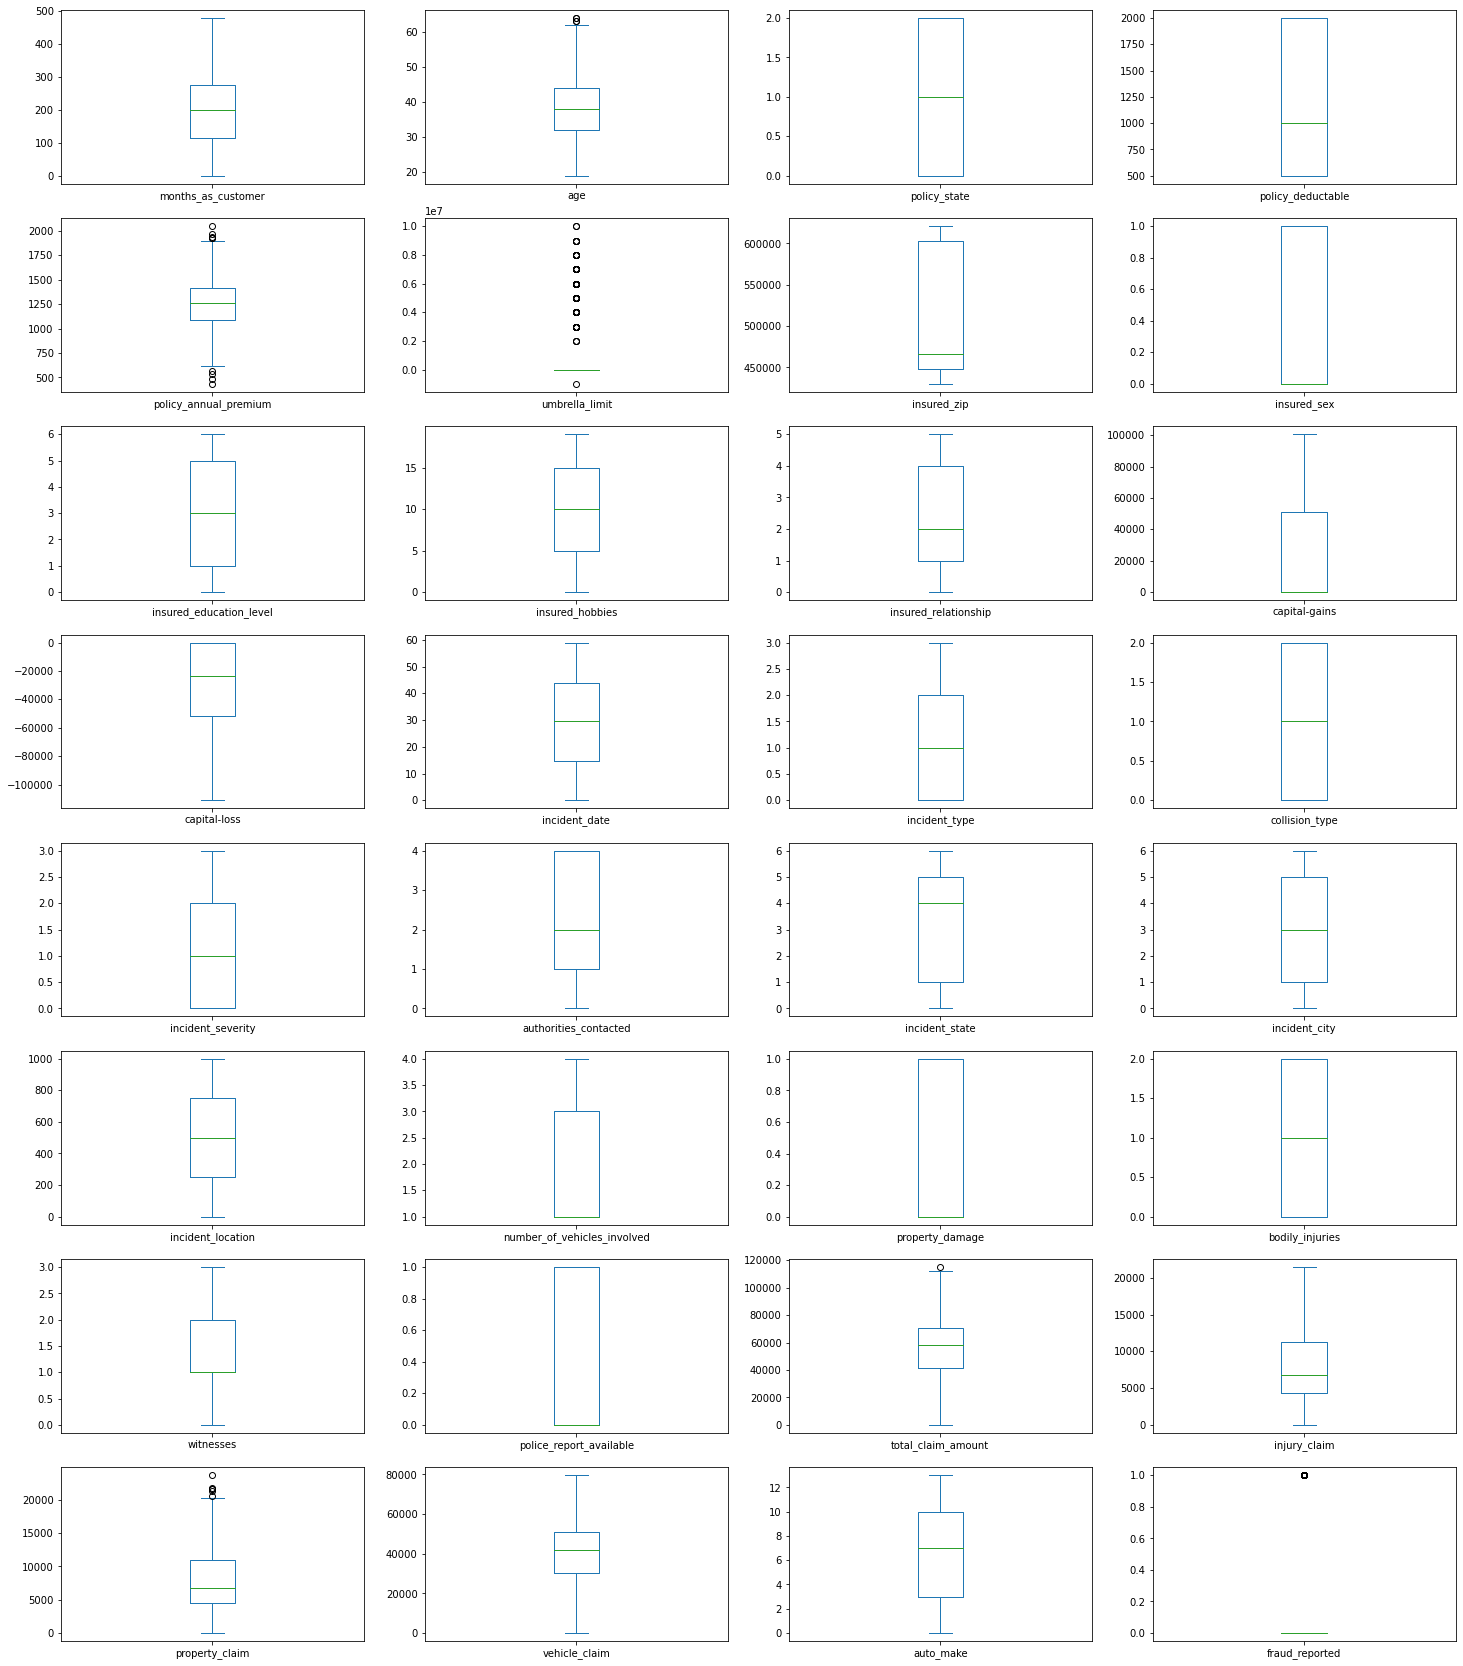

In [71]:
df.plot(kind='box',subplots=True,layout=(8,4),figsize=(25,30))

# Checking the skewness

In [72]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


# Very less columns have the skewnss so we can proceed with this

# Removing Outliers

In [73]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 28,  5,  5,  5,  4, 12,
        5,  5,  5], dtype=int64))


(980, 32)

In [74]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,2,1000,1406.91,0,466132,1,4,17,...,1,1,2,1,71610,6510,13020,52080,10,1
1,228,42,1,2000,1197.22,5000000,468176,1,4,15,...,0,0,0,0,5070,780,780,3510,8,1
2,134,29,2,2000,1413.14,5000000,430632,0,6,2,...,0,2,3,0,34650,7700,3850,23100,4,0
3,256,41,0,2000,1415.74,6000000,608117,0,6,2,...,0,1,2,0,63400,6340,6340,50720,3,1
4,228,44,0,1000,1583.91,6000000,610706,1,0,2,...,0,0,1,0,6500,1300,650,4550,0,0


# Model Building

In [75]:
#sepearting the dependent and independent varaibles
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [76]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [77]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

In [78]:
# FInding the best random state
model=[lg,rdc,svc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.782312925170068 on random state 45


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.30)

# Logistic Regression

In [80]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred1))

Accuracy Score:  0.782312925170068
Confusion Matrix:  
 [[228   1]
 [ 63   2]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       229
           1       0.67      0.03      0.06        65

    accuracy                           0.78       294
   macro avg       0.73      0.51      0.47       294
weighted avg       0.76      0.78      0.70       294



# Decision Tree Classifier

In [81]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.8095238095238095
Confusion Matrix:  
 [[196  33]
 [ 23  42]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       229
           1       0.56      0.65      0.60        65

    accuracy                           0.81       294
   macro avg       0.73      0.75      0.74       294
weighted avg       0.82      0.81      0.81       294



# Support Vector Classifier

In [82]:
svc.fit(x_train,y_train)
pred3=svc.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.7789115646258503
Confusion Matrix:  
 [[229   0]
 [ 65   0]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       229
           1       0.00      0.00      0.00        65

    accuracy                           0.78       294
   macro avg       0.39      0.50      0.44       294
weighted avg       0.61      0.78      0.68       294



# Random Forest Classifier

In [83]:
rdc.fit(x_train,y_train)
pred4=rdc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.782312925170068
Confusion Matrix:  
 [[210  19]
 [ 45  20]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       229
           1       0.51      0.31      0.38        65

    accuracy                           0.78       294
   macro avg       0.67      0.61      0.63       294
weighted avg       0.75      0.78      0.76       294



# KNeighbor Classifier

In [84]:
knc.fit(x_train,y_train)
pred5=knc.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred5))
print('Classification Report: ','\n',classification_report(y_test,pred5))

Accuracy Score:  0.7312925170068028
Confusion Matrix:  
 [[205  24]
 [ 55  10]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       229
           1       0.29      0.15      0.20        65

    accuracy                           0.73       294
   macro avg       0.54      0.52      0.52       294
weighted avg       0.68      0.73      0.70       294



# Cross Val Score

In [85]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(dtc,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  75.71840428259632
at cv=  4
cross val score =  77.9591836734694
at cv=  5
cross val score =  78.26530612244899
at cv=  6
cross val score =  78.16786373385206


# Hypermeter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['gini','entropy'],
       'splitter':['best','random'],
      'max_features':['sqrt','log2','auto'],
      'max_depth':[2,3,4,5]}

GCV=GridSearchCV(dtc,param,cv=4,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [87]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7721088435374149

# AUC ROC Curve

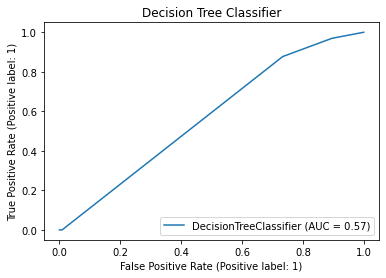

In [88]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Decision Tree Classifier')
plt.show()

# Decision Tree Classifier Model has an accuracy of 49%

# Saving the model

In [89]:
import pickle
filename='insurancefraud_pred.pkl'
pickle.dump(dtc, open(filename,'wb'))

# Conclusion

In [90]:
a=np.array(y_test)
pred=np.array(pred2)
insurance_fraud=pd.DataFrame({'Actual':a,'Predicted':pred})
insurance_fraud

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
289,0,0
290,0,0
291,0,0
292,0,0
